# Lab Assignment 2

**Computer Vision** - Term 5, 2022

Instructor: Dr. Saumya Jetly <br>
TA: Ribhu Lahiri

*Deadline: Sunday, 13 March 2022 11:59 am* 

Submission form link: https://forms.gle/HGkVEoMgK62C7oWd7

Total points: 5 (with possible extra credit)


### Task 1: Creating and applying new filters (3 points)
The first task is to create the convolve function. As discussed in lecture, you need to implement a function which takes a filter (kernel) and convolves it over the image using a sliding window. As an output you should get the processed image.

**Extra Credit:** Create a mathematical convolution function and a correlation function. Use both on the same image with the same filter. Is there a difference in the output? (0.5 points)

In [19]:
# Imports 
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.fftpack as fp

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Reading in a sample image
from PIL import Image

im = cv2.imread("/content/drive/MyDrive/arch1.jpeg", 0)
im1 = cv2.imread("/content/drive/MyDrive/arch2.jpeg", 0)
im = im1
# TRY RUNNING WITH BOTH IMAGES

**Implement the convolve function** *(2 points)*

Use the helper method `sliding_window` to create a function that uses the sliding window to convolve over a given image.

In [22]:
# Task: 

def sliding_window(receptive_field, filter):
    ''' 
    Convolves a filter over the receptive field from the image

    Parameters
    ----------
    receptive_field: np.ndarray
        The portion of the image the convolution is being done over

    filter: np.ndarray
        The defined filter

    Returns
    -------
    np.ndarray
        The convolved receptive field output

    '''
  
    return np.sum(filter * receptive_field)
    
def convolve(image, kernel):
    ''' 
    Convolves the filter over the image (sliding window)

    Parameters
    ----------
    image: np.ndarray
        The image as a 2-dimensional matrix

    kernel: np.ndarray
        The defined filter

    Returns
    -------
    output_image: np.ndarray
        The image after convolving the filter over it
    '''
    # We flip before convolution
    kernel = np.flipud(np.fliplr(kernel))

    kx, ky = kernel.shape[0:2]
    ix, iy = image.shape[0:2]

    output = np.zeros((ix - kx + 1, iy - ky + 1))

    for y in range(image.shape[1]-ky+1):
        for x in range(image.shape[0]-kx+1):
            # Dot product for kernel sized parts of the image
            output[x, y] = sliding_window(image[x : x + kx, y : y + ky], kernel)
    return output

def correl(image, kernel):
    '''This function is the same as convolution with a flipped kernel'''    
    return convolve(image, np.flipud(np.fliplr(kernel)))

Sample Sharpen filter to check functionality

In [23]:
image_array = np.asarray(im)

# Sharpen
filter = np.array(([0, -1, 0], 
                   [-1, 7, -1], 
                   [0, -1, 0]))

In [24]:
filtered_im = convolve(image_array, filter)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694dd81cd0>,
 Text(0.5, 1.0, 'Sharpened'))

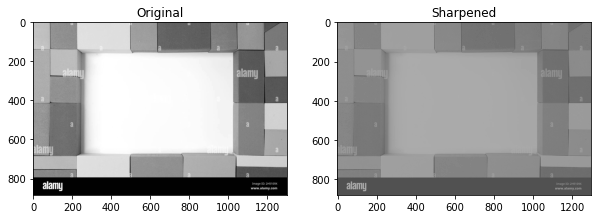

In [25]:
fsize = (10,6)
plt.figure(figsize = fsize)
plt.subplot(121),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(122),plt.imshow(filtered_im, 'gray'), plt.title('Sharpened')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694dc8f090>,
 Text(0.5, 1.0, 'Correl'))

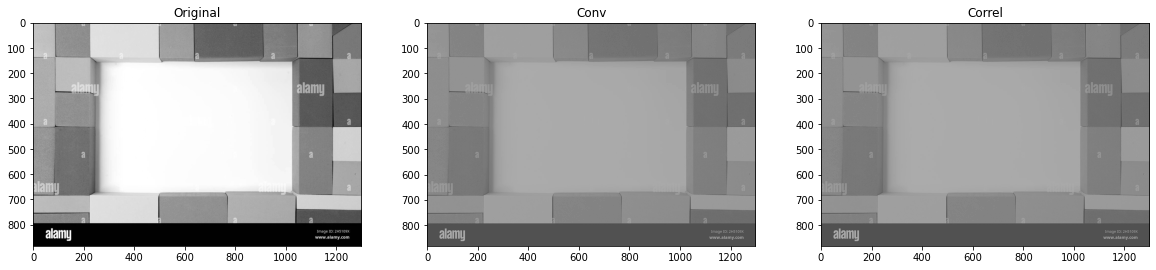

In [26]:
# Convolve vs Correl
filtered_im1 = correl(image_array, filter)

fsize = (20,10)
plt.figure(figsize = fsize)
plt.subplot(131),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(132),plt.imshow(filtered_im, 'gray'), plt.title('Conv')
plt.subplot(133),plt.imshow(filtered_im1, 'gray'), plt.title('Correl')
# Same output since symmetric filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694db3efd0>,
 Text(0.5, 1.0, 'Correl'))

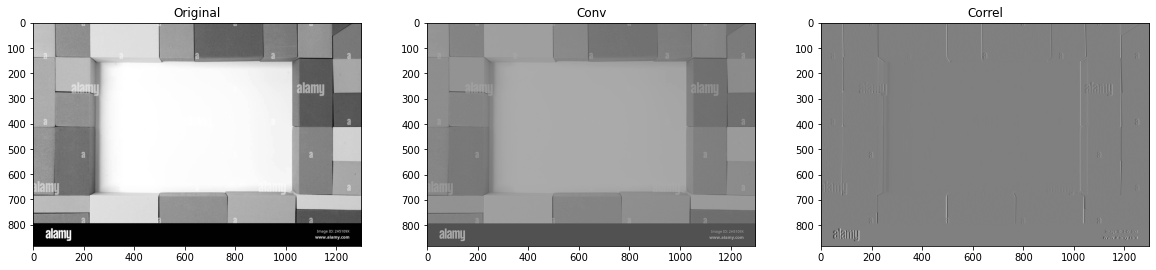

In [27]:
# Convolve vs Correl2
image_array = np.asarray(im)
filter = np.array(([1, 0, -1], 
                   [2, 0, -2], 
                   [1, 0, -1]))

filtered_im1 = convolve(image_array, filter)
filtered_im1 = correl(image_array, filter)

fsize = (20,10)
plt.figure(figsize = fsize)
plt.subplot(131),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(132),plt.imshow(filtered_im, 'gray'), plt.title('Conv')
plt.subplot(133),plt.imshow(filtered_im1, 'gray'), plt.title('Correl')
# different output since asymmetric filter

Sobel filters to check functionality

In [28]:
# Sobel filters
sobel_vert = np.array(([1, 0, -1], 
                       [2, 0, -2], 
                       [1, 0, -1]))

sobel_hor = np.array(([1,2,1], 
                      [0,0,0], 
                      [-1,-2,-1]))

filtered_v = convolve(image_array, sobel_vert)
filtered_h = convolve(image_array, sobel_hor)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694dabf0d0>,
 Text(0.5, 1.0, 'Sobel Horizontal'))

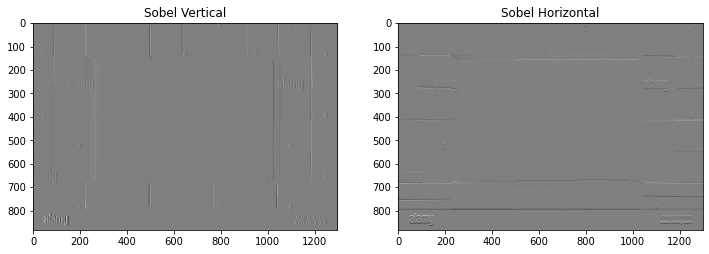

In [29]:
fsize = (12,8)
plt.figure(figsize = fsize)
plt.subplot(121), plt.imshow(filtered_v, 'gray'), plt.title('Sobel Vertical')
plt.subplot(122), plt.imshow(filtered_h, 'gray'), plt.title('Sobel Horizontal')

In [30]:
#Combining them
sobel_edge_detector = np.sqrt(filtered_h**2 + filtered_v**2)

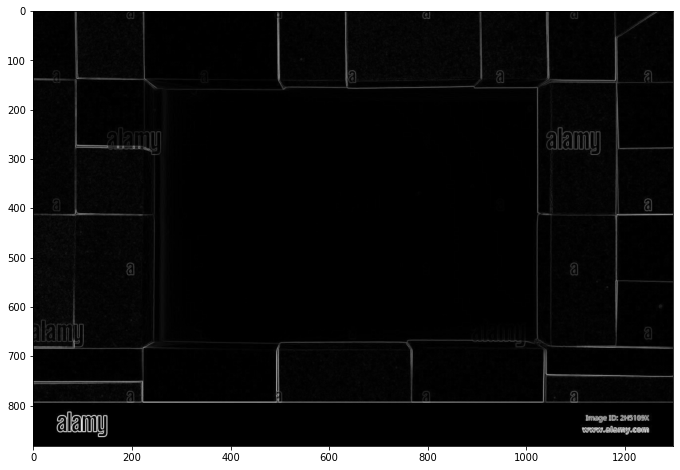

In [31]:
plt.figure(figsize=fsize)
plt.imshow(sobel_edge_detector, 'gray')

**Try the convolve function with your own filter** *(1 points)*

Create your own filter (or use one from Google) and convolve it over your imported image

In [32]:
# TODO:
# YOUR FILTER HERE
filter = np.array(([-2, -1, 0], 
                   [-1, 1, 1], 
                   [0, 1, 2]))
# filter1 = np.array(([0,0,-1,0,0], 
#                    [0,-1,-2,-1,0], 
#                    [-1,-2,16,-2,-1],
#                    [0,-1,-2,-1,0],
#                     [0,0,-1,0,0]))
filter1 = np.array(([0,0,0,0,0],
                    [0,-1,-1,-1,0],
                    [0,-1,1,-1,0],
                    [0,-1,-1,-1,0],
                    [0,0,0,0,0]))

In [33]:
filtered_im = convolve(image_array, filter)
filtered_im1 = convolve(image_array, filter1)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694d998810>,
 Text(0.5, 1.0, 'Filtered1'))

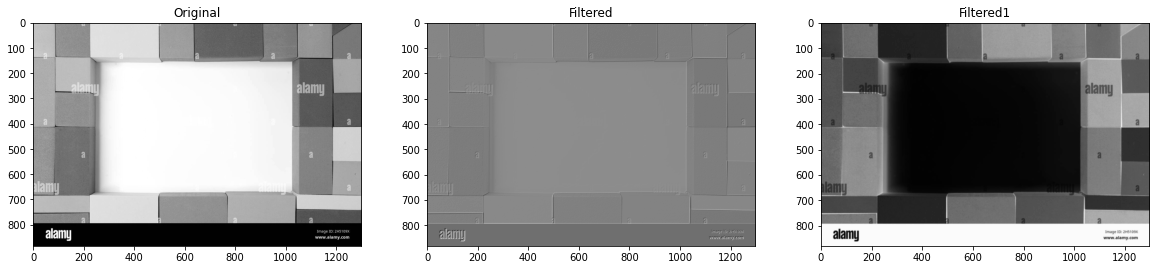

In [34]:
fsize = (20,10)
plt.figure(figsize = fsize)
plt.subplot(131),plt.imshow(im, 'gray'), plt.title('Original')
plt.subplot(132),plt.imshow(filtered_im, 'gray'), plt.title('Filtered')
plt.subplot(133),plt.imshow(filtered_im1, 'gray'), plt.title('Filtered1')

### Task 2: Creating and applying Hough filter (2 points)

**Implement Hough Transform** *(2 points)*

Create a Hough Transform to detect ***rectangles*** in a given image. It might not be perfect due to the hyperparameters you pick but your goal should be to implement the function.

Feel free to use the helper canny function along with any other inbuilt opencv methods

**Extra Credit:** Implement the Hough Transform from scratch, i.e. without using openCV (0.5 points)

In [35]:
def canny(img):
    '''
    Applies the canny filter to detect edges in a given image

    Parameters
    ----------
    img: np.ndarray
        The image as a 2-dimensional matrix

    Returns
    -------
    edges: np.ndarray
        The image after applying canny filter, i.e. with edges
        highlighted
    '''
    low_threshold = 50
    high_threshold = 100
    edges = cv2.Canny(img, low_threshold, high_threshold)
    return edges

def parallel_lines(line1, line2):
    return line1[0]//line1[1] == line2[0]//line2[1]

def perpendicular_lines(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2
    if (x2 - x1 == 0 and x4 - x3 == 0):
        return False
    elif (x2 - x1 == 0):
        m2 = (y4 - y3) / (x4 - x3)
        if (m2 == 0):
            return True
        else:
            return False
    elif (x4 - x3 == 0):
        m1 = (y2 - y1) / (x2 - x1)
        if (m1 == 0):
            return True
        else:
            return False
    else:
        m1 = (y2 - y1) / (x2 - x1)
        m2 = (y4 - y3) / (x4 - x3)
        if (m1 * m2 == -1):
            return True
        else:
            return False

def hough(img):
    '''
    Apply Hough Transform to a given image to detect rectangles.

    Parameters
    ----------
    img: np.ndarray
        The image as a 2-dimensional matrix

    Returns
    -------
    edges: np.ndarray
        The image after applying hough transform, i.e. with rectangles
        highlighted
    '''

    edges = canny(img)
    # This would create the lines around the rectangles which would give us the
    # desired shape.
    lines = cv2.HoughLinesP(edges,1,np.pi/180,threshold=50,minLineLength=10,maxLineGap=1)
    if lines is not None:
        for points in lines:
            x1,y1,x2,y2=points[0]
            cv2.line(img,(x1,y1),(x2,y2),(0,0,0),2)
    return img

# Attempt to take pair of perpendicular and parallel lines to create rect
    # lines = cv2.HoughLinesP(edges,1,np.pi/180,threshold=50,minLineLength=10,maxLineGap=1)
    # if lines is not None:
    #     for p in range(len(lines)):
    #         for q in range(p+1,len(lines)):
    #             for i in range(len(lines)):
    #                 for j in range(i+1,len(lines)):
    #                     if parallel_lines(lines[i][0], lines[j][0]) and parallel_lines(lines[p][0], lines[q][0])\
    #                     and ((perpendicular_lines(lines[i][0], lines[p][0]) and perpendicular_lines(lines[j][0], lines[q][0]))\
    #                     or (perpendicular_lines(lines[i][0], lines[q][0]) and perpendicular_lines(lines[j][0], lines[p][0]))):
    #                         x1,y1,x2,y2=lines[i][0]
    #                         cv2.line(img,(x1,y1),(x2,y2),(0,0,0),2)
    #                         p1,q1,p2,q2=lines[j][0]
    #                         cv2.line(img,(p1,q1),(p2,q2),(0,0,0),2)

    #                         a1,b1,a2,b2=lines[p][0]
    #                         cv2.line(img,(a1,b1),(a2,b2),(0,0,0),2)
    #                         c1,d1,c2,d2=lines[q][0]
    #                         cv2.line(img,(c1,d1),(c2,d2),(0,0,0),2)
    return img

(<matplotlib.axes._subplots.AxesSubplot at 0x7f694d975610>,
 Text(0.5, 1.0, 'Hough'))

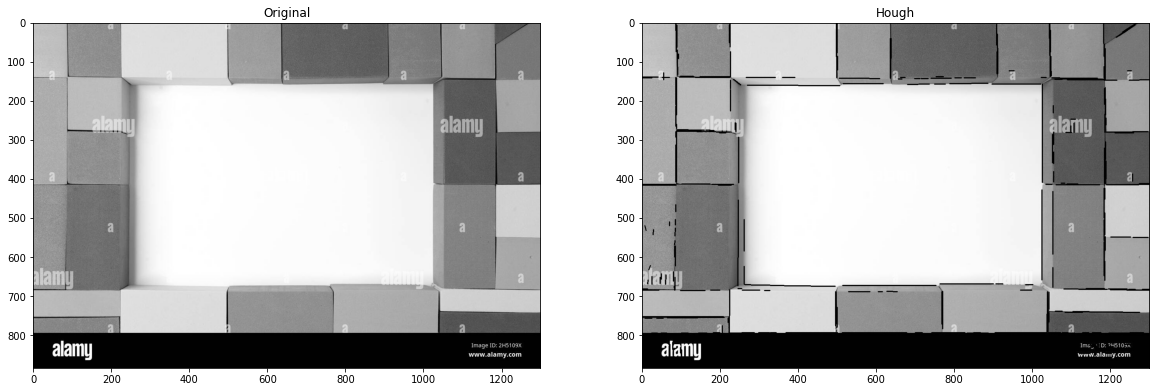

In [36]:
fsize = (20,10)
plt.figure(figsize = fsize)
im = cv2.imread("/content/drive/MyDrive/arch2.jpeg", 0)

plt.subplot(121),plt.imshow(cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)), plt.title('Original')
plt.subplot(122),plt.imshow(cv2.cvtColor(hough(im), cv2.COLOR_GRAY2RGB)), plt.title('Hough')